#  Machine Learning for Bioinformatics
## Practical Homework No.4 (100 points)

#### Name: Monireh Safari
#### Student No.: 98201803


## Imports

run below cell to import necessary libraries. You are only allowed to use these libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)



## Dataset (10 points)

This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

In [170]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
# load all data using pandas. 
# DataSet.csv as train dataset.
# labels.csv as data labels.
# And Drop columns including call name as these columns as it doesn't have any 
# statistical relevance
##################################################################################### 
Train_Data = pd.read_csv("DataSet.csv")
labels = pd.read_csv("labels.csv")
####################################################################################
#                                   THE END                                        #
####################################################################################  
Train_Data.head()


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,57,58,60,61,65,66,63,64,62,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,-137,-157,-172,-47,-62,-58,-161,-48,-176,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-51,-370,-122,-442,-198,-217,-215,-531,-284,-126
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-82,-77,38,-21,-5,63,-46,-124,-81,-50
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,178,340,31,396,141,95,146,431,9,211
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-135,-438,-201,-351,-256,-191,-172,-496,-294,-206


Here we go to pre process the data for pca analysis. do these steps one by one

In [171]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
# Drop Gene Description and Gene Accession Number to have a numeric matrix.
# the result should be stored in train variable.
#####################################################################################
train = Train_Data.drop(["Gene Description","Gene Accession Number"],axis=1)
####################################################################################
#                                   THE END                                        #
####################################################################################  
train.index = pd.to_numeric(train.index)
train.sort_index(inplace=True)

train.head()


,1,2,3,4,5,6,7,8,9,10,...,57,58,60,61,65,66,63,64,62,72
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-137,-157,-172,-47,-62,-58,-161,-48,-176,-131
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-51,-370,-122,-442,-198,-217,-215,-531,-284,-126
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-82,-77,38,-21,-5,63,-46,-124,-81,-50
3,88,283,309,12,168,71,55,-2,268,219,...,178,340,31,396,141,95,146,431,9,211
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-135,-438,-201,-351,-256,-191,-172,-496,-294,-206


In [172]:
# TODO: limited_data should contain columns of data corresponding to genes with most variance
all_vars = np.var(train.T)
print(len(all_vars))

soreted_all_vars = sorted(range(len(all_vars)), key=lambda k: all_vars[k],reverse= True)
limited_data = []
for j in range(1000) : 
    limited_data.append(train.loc[soreted_all_vars[j]])
limited_data = pd.DataFrame(limited_data)

limited_data.head()

7129


,1,2,3,4,5,6,7,8,9,10,...,57,58,60,61,65,66,63,64,62,72
5709,17602,9868,28056,23812,3553,7809,41911,3991,978,6153,...,2545,49282,34378,36026,3542,53204,32,382,7531,27457
5710,17962,16964,23436,22240,5472,7418,33041,25832,1671,8419,...,3115,59647,29929,30107,5836,33833,77,780,11055,23314
18,15091,11038,16692,15763,18128,34207,30801,25147,15272,21801,...,38690,58203,31022,36915,22818,39323,15689,41570,39538,23462
5506,21011,25240,14950,31449,12606,24722,30267,34136,13273,6933,...,9267,10769,18444,25102,8212,3946,25367,71369,48374,17061
1867,-272,-194,-79,-300,-157,-202,-253,-272,-130,352,...,74,0,34591,-201,-5,58,-398,252,-97,746


## PCA (30 points)


Implement PCA. Then use it to project the data to the latent space. Finally, reconstruct the data and report the reconstruction error for both training and test datasets. Note that you should implement the PCA, so using existing libraries is not allowed. you should use numpy to compute eigenvectors/eigenvalues of a matrix.

In [173]:
from sklearn.metrics import mean_squared_error
def loss_function(a, b):
  #####################################################################################
  #                          COMPLETE THE FOLLOWING SECTION                           #
  #####################################################################################
  # Implement a function that given the original data and a
  # reconstructed version, returns the reconstruction's mean squared error.
  #####################################################################################
    b = np.array(b).T
    a = np.array(a)
    c = np.power(np.subtract(a, b), 2)
        
    result = np.mean(c)
  ####################################################################################
  #                                   THE END                                        #
  #################################################################################### 
    return result

In [183]:
def PCA(X, n_components=72):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # X: a vector of shape (N, M)
    # n_components: size of latent space (< M)
    # returns a vector of shape (n_components, M) containing the first `n_components` PCs.
    #####################################################################################
    XT = X.T
    M = np.mean(XT.T, axis=1)
    C =  np.array(XT - M)
    V = np.cov(C.T)
    values, vectors = np.linalg.eig(V)
    sorted_values = sorted(range(len(values)), key=lambda k: values[k],reverse= True)
    vector = []
    for i in range(n_components):
        vector.append(vectors[sorted_values[i]])
    vector = np.array(vector)
    ####################################################################################
    #                                   THE END                                        #
    #################################################################################### 
    return vector

In [184]:
pca = PCA(limited_data)

In [190]:
def reconstruct_PCA(X):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # Compute PCs for the X.
    # Project X to the space of computed PCs.
    # Reconstruct X from projected data.
    #####################################################################################
    principal_components = PCA(X)
    principal_components = principal_components.real
    XT = X.T
    M = np.mean(XT.T, axis=1)
    M_matrix = np.matrix([M for i in range(72)])
    C = np.array(XT - M)
    projected_data = C.dot(principal_components.T) 
    print("projected data shape : ", projected_data.shape)
    reconstructed_data = projected_data.dot(principal_components) + M_matrix
    print("reconstructed data shape : ", reconstructed_data.shape)
   
    
    
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################     
    return reconstructed_data


In [191]:
pca_rec = reconstruct_PCA(limited_data)

projected data shape :  (72, 72)
reconstructed data shape :  (72, 1000)


In [192]:
## Run This cell to find how your functions working!
loss_function(pca_rec , limited_data.values.tolist())


3725633.9464746113

## K-Means (20 points)



read the below cell codes. this is using sklearn pca implementation. we use this function to use in our kmeans clustering.

In [193]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
limited_data_new = limited_data.T
x_norm = StandardScaler().fit_transform(limited_data_new)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf = principalDf.set_index(labels.index)
finalDf = pd.concat([principalDf, labels['cancer']], axis = 1)
finalDf


,PC1,PC2,cancer
0,4.341201,-4.770872,ALL
1,14.195648,1.693617,ALL
2,14.183927,-1.751284,ALL
3,1.756293,-3.357064,ALL
4,11.519685,-9.365318,ALL
...,...,...,...
67,-9.111561,-8.859139,ALL
68,9.836477,22.720640,ALL
69,-1.017387,19.754241,ALL
70,-4.869207,17.797066,ALL


here we try to initialize centroids. Note that we already knows we have two cluster, So from our prior knowledge we define number of clusters equal to two.

In [194]:
import copy
np.random.seed(1000)
# Number of clusters
k = 2
X = np.array(list(zip(finalDf['PC1'], finalDf['PC2'])))
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)
C_copy = copy.copy(C)

[[23.  0.]
 [ 7. 30.]]


Now you can see the unlabeled data and our initialization data by running following cell

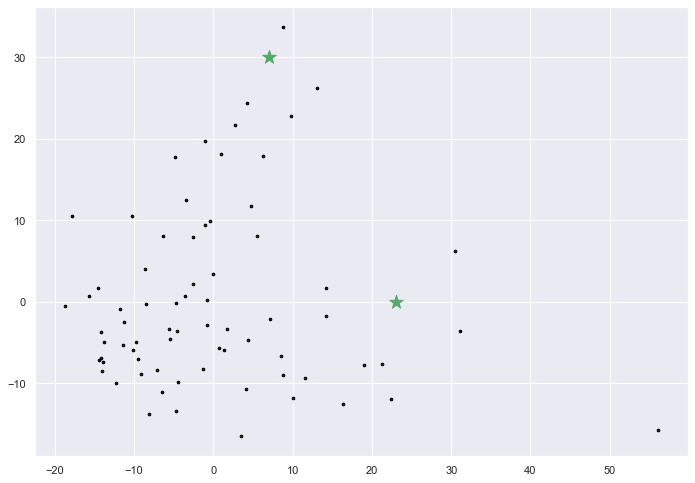

In [195]:
# Plotting along with the Centroids
plt.scatter(finalDf['PC1'], finalDf['PC2'], c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

It's your turn. Implement K-Means function which return a np.array with size equal to your data. this array contain each point label that you assigned using kmeans clustering.

In [196]:
def Kmeans(X, Centroids):
    
    clusters = np.zeros(len(X))
    # To store the value of centroids when it updates
    C = Centroids
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = np.linalg.norm(C - C_old)
    ####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                          #
    ####################################################################################
    # Implement K-Means Clustering
    # Assigning each value to its closest cluster
    # Storing the old centroid values
    # Finding the new centroids by taking the average value
    # clusters variable should contain (0,1) labels. 0 for first cluster and 1 for the second. 
    ####################################################################################
    # Loop will run till the error becomes zero
    # Do Not Forget to update error condition.
    c = 0
    while error != 0:
        c0_new = 0
        c1_new = 0
        for n,row in enumerate(X) :
            dist0 = np.linalg.norm(np.array(row) - np.array(C[0]))
            dist1 = np.linalg.norm(np.array(row) - np.array(C[1]))        
            if dist0 < dist1 : 
                clusters[n] = 0 
                c0_new+= row
                
            else : 
                clusters[n] = 1
                c1_new+= row
        c0_new = c0_new/len([i for i in clusters if i == 0])
        c1_new = c1_new/len([i for i in clusters if i == 1])
        C_old = C
        C = [c0_new, c1_new]
        error = np.linalg.norm(np.matrix(C) - np.matrix(C_old))
        
            
            


    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################
    print("finish")
    return clusters,C

In [197]:
clusters, centers = Kmeans(X, C)

finish


Now just run cell below to plot your result. 

kmeans clusters' centers :  [-0.73560072 -5.60245289]
acc :  0.7777777777777778


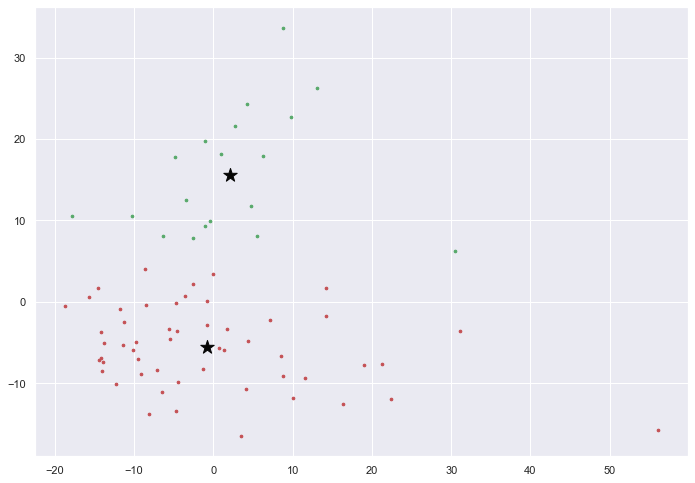

In [199]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
print("kmeans clusters' centers : ",centers[0])
new_label = [0 if labels["cancer"][i] == "ALL" else 1 for i in labels.index]
c = 0
for i in range(len(labels)) :
    if new_label[i] == clusters[i] :
        c+=1
print("acc : ", c/len(labels))

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter([centers[0][0],centers[1][0]],[centers[0][1],centers[1][1]], marker='*', s=200, c='#050505')

This part shows real labels of the samples. just run this cell and answer the next question. 

(-20, 25)

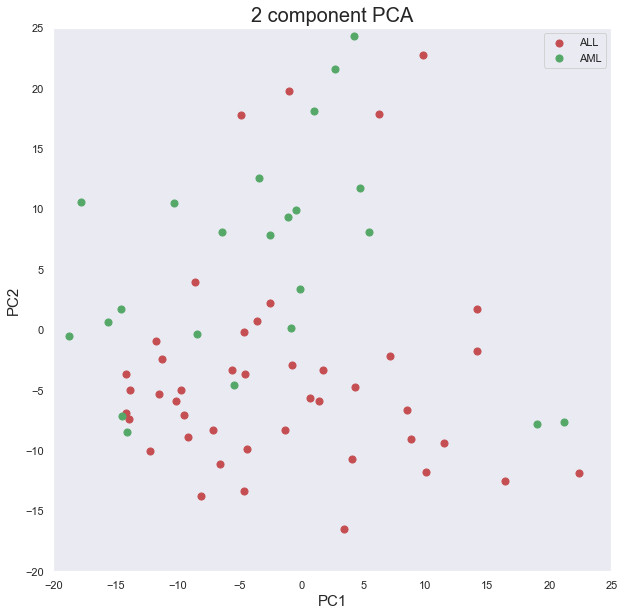

In [200]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['ALL','AML']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cancer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
ax.set_xlim([-20, 25])
ax.set_ylim([-20, 25])

Compare your results with the figure above and tell us what will change if we change the random seed (try it with two or three different seeds) and what is the solution?

در حالتی که سید برابر 1000 هست دقت برابر 77 درصد می شود. وقتی سید را عوض میکنیم مرکزهای رندوم تغییر می کنند و از آن جایی که این الگوریتم به این که با چه مراکزی شروع کنیم حساس است در نتیجه نتایج تغییر می کند اگر شروع رندوم شروع مناسب نباشد. مثلا برای مقدار 100 دقت 56 درصد و برای مقدار 2 دقت 47 درصد است که کاملا کلاسترهای متفاوتی به دست می آیند. برای این که چنین اتفاقی نیفتد میتوانیم چندین بار با شروع های مختلف این الکوریتم را اجرا کرده و در نهاین بهترین حالت یا رای گیری بین مدل ها را انجام دهیم. همچنین راه کارهایی برای انتخاب بهتر مراکز اولیه وجود دارد که میتوانیم از این راهکارها به جای رندوم استفاده کنیم. مثلا یکی از راه ها این است که ابتدا یک مرکز رندوم بگیری بعد مرکز بعدی را گره ای بگیریم که بیشترین فاصله را تا مقدار فعلی دارد 

## GMM (30 points)

The EM algorithm for GMM can be simplified in the following steps:

Assuming K is the number of clusters, and N is the number of data points


$z_j^i$ is 1 if $x^i$ is generated from mixture j

Initialize $\mu_k$, $\Sigma_k$ and $\pi_k$ k=1,...K


$\theta=[\pi,\mu,\Sigma]$
## E step:
$\gamma_j^i=P(z_j^i=1|x^i, \theta^{old})=\frac{\pi_j^{old}\mathcal{N}(x^i|\mu_j^{old},\Sigma_j^{old})}{\sum_{k=1}^K\pi_k^{old}\mathcal{N}(x^i|\mu_k^{old},\Sigma_k^{old})}$

## M step:
$\mu_j^{new}=\frac{\sum_{i=1}^N \gamma_j^i x^i}{\sum_{i=1}^N \gamma_j^i}$


$\Sigma_j^{new} = \frac{1}{\sum_{i=1}^N \gamma_j^i} \sum_{i=1}^N \gamma_j^i (x^i-\mu_j^{new}) (x^i-\mu_j^{new})^T$


$\pi_j^{new} = \frac{\sum_{i=1}^N \gamma_j^i}{N}$

Repeat E and M steps until convergence.


In [201]:
from scipy.stats import multivariate_normal
import random

class GMM(object):
    def __init__(self, x, k, iterations):
        random.seed(100)
        self.x = x
        self.n = x.shape[0] # data points
        self.f = x.shape[1] # features
        self.k = k  # number of clusters
        self.iterations = iterations
        self.predictions = None
        # TODO: initialte parameters
        self.pi = np.array([1/k for i in range(k)]).reshape(k)  # of size (k)
        self.mu = np.array(centers)# of size (k, f)
        self.sigma = np.array([ np.identity(self.f) for i in range(k)])  # of size (k, f, f)
    
    def calc_gamma(self):
        # TODO: calculate gamma matrix based on parameters and x
        # returns a matrix of shape (n, k) where n is the number of data points
        eps = 1e-8
        gamma = np.array([multivariate_normal.pdf(x=X, mean=self.mu[i], cov=self.sigma[i], allow_singular=True) for i in range(k)]).T
        final_gamma = []
        for i in range(self.n) :
            sum_of_p = sum([self.pi[m] * gamma[i][m] for m in range(self.k)]) + eps
            row = [(self.pi[j] * gamma[i][j]) / sum_of_p for j in range(self.k)]
            final_gamma.append(row)
        final_gamma = np.array(final_gamma)
        return final_gamma
        
    def update_mu(self, gamma):
        # TODO: update self.mu based on x and gamma matrix
        for j in range(self.k) :
            self.mu[j] = np.dot(gamma.T[:][j] ,X)/sum(gamma.T[:][j])
        self.mu = np.array(self.mu)
#         print(self.mu)
        
        
    def update_sigma(self, gamma):
        # TODO: update self.sigma based on x, mu and gamma matrix
        for j in range(self.k) :
            self.sigma[j] = np.dot((gamma.T[:][j].reshape(len(X),1) * (X - self.mu[j])).T, (X - self.mu[j])) / sum(gamma.T[:][j])
        self.sigma = np.array(self.sigma)
        
        
        
    def update_pi(self, gamma):
        # TODO: update self.pi based on gamma matrix
        self.pi = np.array([sum(gamma.T[:][j]) / self.n for j in range(self.k)]).reshape(self.k)
        
    def fit(self):
        for i in range(self.iterations):
            gamma = self.calc_gamma()
            self.update_mu(gamma)
            self.update_sigma(gamma)
            self.update_pi(gamma)
        
        # TODO: predict the mixture for each data
        self.predicitions = np.zeros(self.n)
        self.predicitions = [np.argmax(gamma[i]) for i in range(self.n)]
        return(self.predicitions)
        
        

In [204]:
import matplotlib.pyplot as plt
gmm = GMM(X, 2,15)
gmm_clusters = gmm.fit()
c = 0
for i in range(len(labels)) :
    if new_label[i] == gmm_clusters[i] :
        c+=1
acc = c/len(labels)
print("GMM acc : ",acc)




GMM acc :  0.7777777777777778


GMM clusters' centers : 
 [[ 1.42072003 -5.41456678]
 [-2.39114753  9.02296715]]


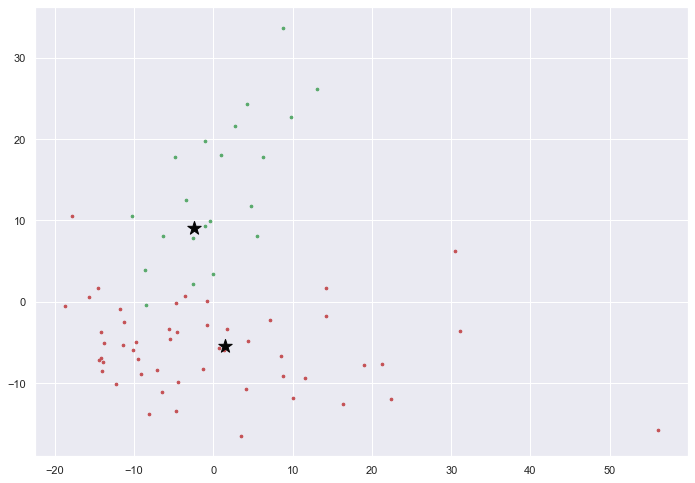

In [206]:
fig, ax = plt.subplots()
C = gmm.mu
print("GMM clusters' centers : \n",C)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if gmm_clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## t-SNE (10 points)

In this part we are using a generated dataset to test the effect of t-SNE hyperparameters.
The data points are on two paralllel lines with a small additive noise.

In [207]:
# load the dataset

X = np.load('X.npy')
y = np.load('y.npy')
print(X.shape)
print(y.shape)

(200, 20)
(200,)


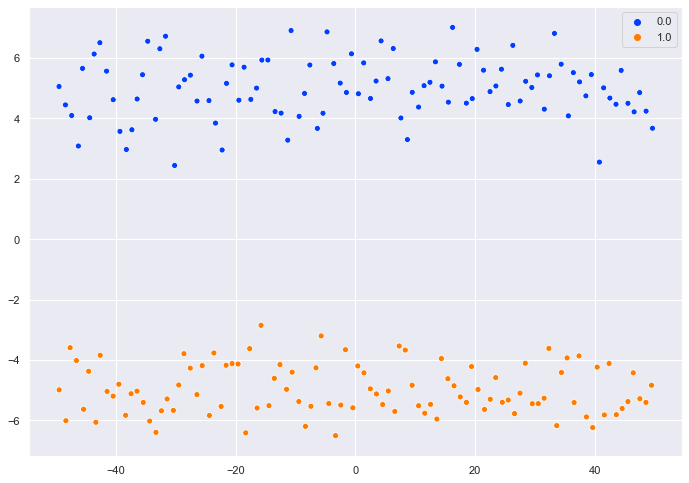

In [208]:
# plot data in 2 dimensions using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=y, legend='full', palette=palette)

Find the best hyperparameters such that the output of t-SNE is similar to the output of PCA. Please make sure that your results are stable. Try running t-SNE a few times until you get the same results.

You can use [this link](https://distill.pub/2016/misread-tsne/) for help!

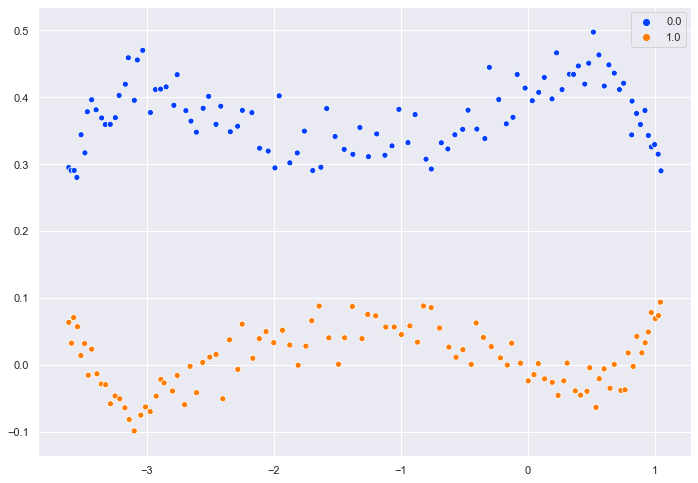

In [209]:
# for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] :
#     for j in [100,200,300,400,500,600,700,800] :
#         tsne = TSNE(n_iter = i, perplexity = 30,learning_rate = j, random_state = 7)  # TODO: set hyperparameters
#         model = tsne.fit(X)
#         print((i, j),model.kl_divergence_)
        
tsne = TSNE(n_iter = 5000, perplexity =135,learning_rate = 650, random_state = 7)
X_embedded = tsne.fit_transform(X)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

# Are the lines perfectly straight? Can you explain why? 

--> 
  این الگوریتم طوری عمل می کند که بخش های چگال تر را در ابعاد جدید بخش تر و گسترده تر کند. از اون جایی که همیشه وسط یک خوشه چگال تر از لبه های اونه در نتیجه بخش میانی در فضای بیشتر پخش می شوند تا لبه های خوشه. و برای این که فضای بیشتر برای چخش بخش های میانی وجود داشته باشد داده ها در فضای دایره طوری پخش می شوند به این صورت نقطه های میانی فضای بیشتری برای پخش و نقطه های لبه کمی به درون خم می شوند.
<--